<a href="https://colab.research.google.com/github/Hanin-Mesfer/Sentiment-Analysis-DeepLearning/blob/main/Sentiment_Analysis_Use_Multiple_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload your kaggle.json file here in google colab

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

### Data Collection- Kaggle API

Go to Dataset in kaggle and press Download

Then choose Kaggle CLI and copy the command

In [3]:
#!/bin/bash
!kaggle datasets download lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 671MB/s]


In [4]:
# unzip the dataset file
from zipfile import ZipFile
with ZipFile("/content/imdb-dataset-of-50k-movie-reviews.zip", "r") as zip_ref:
  zip_ref.extractall()

#Data Discovery

In [5]:
import pandas as pd

data= pd.read_csv("/content/IMDB Dataset.csv")

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
data.shape


(50000, 2)

In [8]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
## Calculate the number of words in each review
data['review'].apply(lambda x: len(str(x).split()))


,review
0,307
1,162
2,166
3,138
4,230
...,...
49995,194
49996,112
49997,230
49998,212


# Text Preprocessing

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


In [12]:

# Download required NLTK resources
nltk.download("stopwords")      # List of common stop words (e.g. "the", "and", "is", etc.)
nltk.download("wordnet")        # WordNet lemmatizer resource
nltk.download("punkt")          # Tokenizer for breaking text into words
nltk.download("punkt_tab")

# Define important negation words we want to keep
important_words = {"not", "no", "nor", "never"}

# Load the list of stopwords and remove the important negation words from it
stop_words = set(stopwords.words("english")) - important_words


# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to clean and preprocess text
def clean_text(text):
    # Remove HTML tags like <br />, <p>, etc.
    text = re.sub(r'<.*?>', ' ', text)

    # Convert all characters to lowercase to ensure consistency
    text = text.lower()

    # Remove any characters that are not letters (a-z) or whitespace
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra whitespace (e.g., multiple spaces or newlines)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize the cleaned text into individual words
    tokens = nltk.word_tokenize(text)

    # Remove stopwords (except negations) and apply lemmatization to each word
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join the tokens back into a single string
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [13]:
data["update_review"] = data["review"].apply(clean_text)

In [14]:
data["review"][1]


'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [15]:
data["update_review"][1]

'wonderful little production filming technique unassuming oldtimebbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen not got polari voice pat truly see seamless editing guided reference williams diary entry not well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwells mural decorating every surface terribly well done'

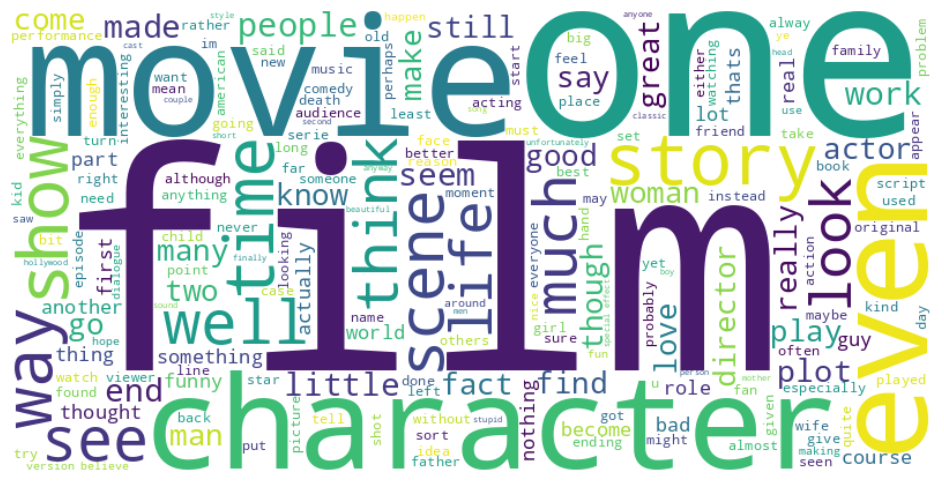

In [16]:
text = " ".join(data["update_review"])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
all_tokens = " ".join(data["update_review"]).split()

word_freq = Counter(all_tokens)

most_common = word_freq.most_common()
most_common

[('movie', 100957),
 ('film', 91574),
 ('not', 62161),
 ('one', 53811),
 ('like', 40022),
 ('time', 30249),
 ('good', 29030),
 ('character', 27982),
 ('story', 24740),
 ('even', 24587),
 ('get', 24517),
 ('no', 24504),
 ('would', 24036),
 ('see', 23700),
 ('make', 23622),
 ('really', 23014),
 ('scene', 21087),
 ('well', 19400),
 ('much', 19110),
 ('people', 18211),
 ('great', 18017),
 ('bad', 18005),
 ('also', 17859),
 ('first', 17212),
 ('show', 17114),
 ('dont', 16976),
 ('way', 16935),
 ('thing', 16353),
 ('made', 15559),
 ('could', 15174),
 ('think', 15169),
 ('life', 14791),
 ('go', 14429),
 ('know', 14196),
 ('watch', 14018),
 ('love', 13526),
 ('many', 13390),
 ('seen', 13302),
 ('actor', 13178),
 ('plot', 13136),
 ('two', 13092),
 ('say', 12933),
 ('never', 12881),
 ('end', 12760),
 ('look', 12663),
 ('acting', 12611),
 ('year', 12498),
 ('best', 12441),
 ('little', 12354),
 ('ever', 11756),
 ('better', 11305),
 ('man', 11159),
 ('take', 11118),
 ('come', 10951),
 ('still', 108

In [18]:
# Calculate how many of the most frequent words are needed
# to cover 95% of all the word usage in the data.
total_occurrences = sum(word_freq.values())
coverage = 0
num_words = 0

for word, freq in most_common:
    coverage += freq
    num_words += 1
    if coverage / total_occurrences >= 0.95:
        break

print(f"You need about {num_words} words to cover 95% ")


You need about 20228 words to cover 95% 


In [19]:
# Prepare tokenizer with top 20228 words; convert texts to integer sequences, unknown words as "<OOV>"
tokenizer = Tokenizer(num_words=20228 ,oov_token="<OOV>")
tokenizer.fit_on_texts(data["update_review"])

sequences = tokenizer.texts_to_sequences(data["update_review"])

In [20]:
# Calculate review lengths statistics to understand sequence sizes
review_lengths = [len(seq) for seq in sequences]

print(" Shortest review length:", np.min(review_lengths))
print(" Longest review length:", np.max(review_lengths))
print(" Average review length:", np.mean(review_lengths))
print(" 95th percentile length:", np.percentile(review_lengths, 95))


 Shortest review length: 3
 Longest review length: 1432
 Average review length: 120.72892
 95th percentile length: 311.0


In [21]:
padded_sequences = pad_sequences(sequences, maxlen=311, padding='post', truncating='post')

In [22]:
#befor padding
for i in range(2):
    print(f"Sequence {i+1}:", sequences[i])


Sequence 1: [5, 1023, 941, 67, 3017, 174, 373, 2882, 107, 504, 481, 25, 29, 2993, 3017, 4859, 13277, 18, 475, 133, 107, 253, 34, 1530, 4, 26, 6220, 5128, 10239, 26, 912, 13, 2033, 2009, 634, 286, 475, 3113, 227, 259, 253, 377, 3017, 8954, 257, 13034, 6091, 2326, 586, 1, 763, 1248, 1, 398, 4294, 1958, 1026, 1950, 1812, 816, 241, 1, 14696, 4, 231, 3994, 3266, 398, 245, 1, 3788, 11139, 6600, 1186, 868, 2289, 15777, 19853, 212, 3820, 6601, 1653, 7725, 7260, 44, 139, 153, 14, 43, 191, 1056, 26, 558, 94, 34, 26, 460, 2422, 690, 98, 246, 3913, 2306, 162, 690, 1119, 690, 1, 71, 797, 101, 25, 174, 51, 122, 2993, 1444, 2022, 310, 43, 1422, 198, 1338, 955, 3017, 96, 8955, 231, 434, 1237, 475, 4, 475, 5672, 6362, 1913, 12319, 2726, 1, 4758, 12319, 272, 455, 12, 153, 19, 8761, 640, 608, 4758, 555, 1026, 4950, 558, 345, 570, 1145, 1026, 379, 67, 3017, 112, 321, 3443, 2987, 1, 12, 781, 3650, 348]
Sequence 2: [295, 50, 237, 1211, 1562, 15778, 1, 1315, 62, 11697, 426, 1, 193, 1699, 334, 238, 40, 457, 1

In [23]:
#after badding
for i in range(2):
    print(f"Padded {i+1}:", padded_sequences[i])


Padded 1: [    5  1023   941    67  3017   174   373  2882   107   504   481    25
    29  2993  3017  4859 13277    18   475   133   107   253    34  1530
     4    26  6220  5128 10239    26   912    13  2033  2009   634   286
   475  3113   227   259   253   377  3017  8954   257 13034  6091  2326
   586     1   763  1248     1   398  4294  1958  1026  1950  1812   816
   241     1 14696     4   231  3994  3266   398   245     1  3788 11139
  6600  1186   868  2289 15777 19853   212  3820  6601  1653  7725  7260
    44   139   153    14    43   191  1056    26   558    94    34    26
   460  2422   690    98   246  3913  2306   162   690  1119   690     1
    71   797   101    25   174    51   122  2993  1444  2022   310    43
  1422   198  1338   955  3017    96  8955   231   434  1237   475     4
   475  5672  6362  1913 12319  2726     1  4758 12319   272   455    12
   153    19  8761   640   608  4758   555  1026  4950   558   345   570
  1145  1026   379    67  3017   112   32

In [24]:

data["label"] = data["sentiment"].map({"negative": 0, "positive": 1})


#-----------------------LSTM--------------------------------------------------------------------------------

In [25]:
from sklearn.model_selection import train_test_split

X = padded_sequences
y = data["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping


vocab_size   = 20228
embedding_dim = 100
max_length    = 300
model = Sequential([
    Input(shape=(max_length,)),Embedding(input_dim=vocab_size,output_dim=embedding_dim),
    LSTM(64, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1,  activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 300, 100)       │     2,022,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 300, 64)        │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 300, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 300, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,166,225 (8.26 MB)

 Trainable params: 2,166,225 (8.26 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [28]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test),callbacks=[early_stop])


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.5044 - loss: 0.6936 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 49ms/step - accuracy: 0.5035 - loss: 0.6934 - val_accuracy: 0.5018 - val_loss: 0.6929
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 48ms/step - accuracy: 0.5095 - loss: 0.6923 - val_accuracy: 0.5010 - val_loss: 0.6935
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.5080 - loss: 0.6924 - val_accuracy: 0.5039 - val_loss: 0.6935
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.5145 - loss: 0.6852 - val_accuracy: 0.5158 - val_loss: 0.6900
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - accuracy: 0.6183 - loss: 0.6410 - val_accuracy: 0.7736 - val_loss: 0.5010
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.8242 - loss: 0.4046 - val_accuracy: 0.8770 - val_loss: 0.3080
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9188 - loss: 0.2286 - 

In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print('Performance Report For LSTM:\n',classification_report(y_test, y_pred_classes))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_classes))



313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step
Performance Report For LSTM:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      4961
           1       0.89      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4404  557]
 [ 579 4460]]


#-----------------------SimpleRNN-----------------------------------------------------------------------------

In [30]:
from tensorflow.keras.layers import SimpleRNN

vocab_size = 20228
embedding_dim = 64
max_length = 300

model_1 = Sequential([
    Input(shape=(max_length,)),Embedding(input_dim=vocab_size,output_dim=embedding_dim),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(64, return_sequences=True),
    SimpleRNN(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_1.summary()

history = model_1.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 300, 64)        │     1,294,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 300, 64)        │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 300, 64)        │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,321,473 (5.04 MB)

 Trainable params: 1,321,473 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 71ms/step - accuracy: 0.5062 - loss: 0.7106 - val_accuracy: 0.5039 - val_loss: 0.6960
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 70ms/step - accuracy: 0.5067 - loss: 0.7007 - val_accuracy: 0.5039 - val_loss: 0.6939
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 66ms/step - accuracy: 0.5004 - loss: 0.6966 - val_accuracy: 0.5096 - val_loss: 0.6943
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 70ms/step - accuracy: 0.5012 - loss: 0.6953 - val_accuracy: 0.5039 - val_loss: 0.6951
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.4982 - loss: 0.6956 - val_accuracy: 0.5082 - val_loss: 0.6935


In [31]:
y_pred = model_1.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print('Performance Report for SimpleRNN:\n',classification_report(y_test, y_pred_classes))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step
Performance Report for SimpleRNN:
               precision    recall  f1-score   support

           0       0.52      0.13      0.20      4961
           1       0.51      0.88      0.64      5039

    accuracy                           0.51     10000
   macro avg       0.51      0.51      0.42     10000
weighted avg       0.51      0.51      0.43     10000

Confusion Matrix:
 [[ 630 4331]
 [ 587 4452]]


#------------------------------GRU----------------------------------------------------------------------------

In [32]:
from tensorflow.keras.layers import GRU

vocab_size = 20228
embedding_dim = 64
max_length = 300

model_2 = Sequential([
    Input(shape=(max_length,)),Embedding(input_dim=vocab_size,output_dim=embedding_dim),
    GRU(124, return_sequences=True),
    GRU(124, return_sequences=True),
    GRU(124),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_2.summary()

history = model_2.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 300, 64)        │     1,294,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 300, 124)       │        70,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 300, 124)       │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 124)            │        93,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 124)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,555,305 (5.93 MB)

 Trainable params: 1,555,305 (5.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.4999 - loss: 0.6940 - val_accuracy: 0.4962 - val_loss: 0.6932
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.5005 - loss: 0.6933 - val_accuracy: 0.5016 - val_loss: 0.6931
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.5094 - loss: 0.6871 - val_accuracy: 0.5024 - val_loss: 0.7043
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.5213 - loss: 0.6715 - val_accuracy: 0.5009 - val_loss: 0.7035
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6546 - loss: 0.5625 - val_accuracy: 0.8774 - val_loss: 0.2922
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.9255 - loss: 0.2001 - val_accuracy: 0.8909 - val_loss: 0.2712
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9659 - loss: 0.1075 - val_accuracy: 0.8801 - val_loss: 0.3399
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9817 - loss: 0.0635 - 

In [33]:
y_pred = model_2.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print('Performance Report For GRU:\n',classification_report(y_test, y_pred_classes))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_classes))



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Performance Report For GRU:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4961
           1       0.91      0.87      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4532  429]
 [ 662 4377]]


#---------------------------- Bidirectional LSTM------------------------------------------

In [34]:
from tensorflow.keras.layers import Bidirectional, LSTM

vocab_size = 20228
embedding_dim = 100
max_length = 300

model_3 = Sequential([
    Input(shape=(max_length,)),Embedding(input_dim=vocab_size,output_dim=embedding_dim),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])


model_3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_3.summary()

history = model_3.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 300, 100)       │     2,022,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        84,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,111,441 (8.05 MB)

 Trainable params: 2,111,441 (8.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.7672 - loss: 0.4615 - val_accuracy: 0.8838 - val_loss: 0.2920
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 28ms/step - accuracy: 0.9257 - loss: 0.2111 - val_accuracy: 0.8847 - val_loss: 0.2871
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.9537 - loss: 0.1344 - val_accuracy: 0.8784 - val_loss: 0.3222
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9682 - loss: 0.0968 - val_accuracy: 0.8791 - val_loss: 0.3827
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step - accuracy: 0.9755 - loss: 0.0770 - val_accuracy: 0.8754 - val_loss: 0.4352


In [35]:
y_pred = model_3.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print('Performance Report For Bidirectional LSTM:\n',classification_report(y_test, y_pred_classes))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Performance Report For Bidirectional LSTM:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89      4961
           1       0.90      0.87      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000

Confusion Matrix:
 [[4465  496]
 [ 657 4382]]


#---------------------------CNN + LSTM------------------------------------------

In [36]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM


vocab_size = 20228
embedding_dim = 64
max_length = 300

model_4 = Sequential([
    Input(shape=(max_length,)),Embedding(input_dim=vocab_size,output_dim=embedding_dim),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_4.summary()

history = model_4.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 300, 64)        │     1,294,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 296, 128)       │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 148, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 148, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,225 (5.42 MB)

 Trainable params: 1,420,225 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.5045 - loss: 0.6923 - val_accuracy: 0.5039 - val_loss: 0.6929
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5083 - loss: 0.6921 - val_accuracy: 0.5098 - val_loss: 0.6864
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.7487 - loss: 0.4953 - val_accuracy: 0.8621 - val_loss: 0.3233
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9015 - loss: 0.2604 - val_accuracy: 0.8853 - val_loss: 0.2768
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9386 - loss: 0.1764 - val_accuracy: 0.8894 - val_loss: 0.2997
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9611 - loss: 0.1201 - val_accuracy: 0.8783 - val_loss: 0.2959
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9806 - loss: 0.0741 - val_accuracy: 0.8821 - val_loss: 0.3674


In [37]:
y_pred = model_4.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print('Performance Report For CNN + LSTM:\n',classification_report(y_test, y_pred_classes))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Performance Report For CNN + LSTM:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89      4961
           1       0.89      0.88      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
 [[4418  543]
 [ 604 4435]]


In [38]:
def predict_sentiment(review):
    review = review.lower()
    review = re.sub(r'[^a-z0-9\s]', '', review)
    review = review.strip()

    sequence = tokenizer.texts_to_sequences([review])

    padded = pad_sequences(sequence, maxlen=300, padding='post', truncating='post')

    prediction = model.predict(padded).item()
    if prediction >= 0.5:
        return "positive"
    else:
        return "negative"


In [39]:
print(predict_sentiment("This movie was absolutely amazing!"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
negative


In [40]:

print(predict_sentiment("Despite my initial skepticism, I found the film to be a refreshingly original masterpiece, with outstanding performances and a plot that kept me engaged and emotionally invested until the very last frame."))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
positive


In [41]:
print(predict_sentiment('Although the film had potential, its painfully slow pacing, shallow characters, and lack of coherent direction made it feel more like a tedious chore than a cinematic experience.'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
negative
